To create an employee cluster to show absenteeism at work and try to identify the top contributors for it

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv",delimiter=';')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
df.shape

(740, 21)

In [4]:
df.head(3)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2


In [5]:
df.tail(3)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,...,0,1,1,0,0,1,77,175,25,0


In [6]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [7]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [8]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [10]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [11]:
df[df.duplicated(keep=False)]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
16,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
63,34,23,10,3,4,118,10,10,37,253.465,...,0,1,0,0,0,0,83,172,28,3
68,34,23,10,3,4,118,10,10,37,253.465,...,0,1,0,0,0,0,83,172,28,3
81,28,23,11,4,4,225,26,9,28,306.345,...,0,1,1,0,0,2,69,169,24,1
88,28,23,11,4,4,225,26,9,28,306.345,...,0,1,1,0,0,2,69,169,24,1
105,10,22,12,4,4,361,52,3,28,261.306,...,0,1,1,1,0,4,80,172,27,8
109,10,22,12,4,4,361,52,3,28,261.306,...,0,1,1,1,0,4,80,172,27,8
118,27,23,1,5,2,184,42,7,27,308.593,...,0,1,0,0,0,0,58,167,21,2
121,34,27,1,2,2,118,10,10,37,308.593,...,0,1,0,0,0,0,83,172,28,2


In [12]:
df.drop_duplicates(subset=None,keep='first',inplace=True)

In [13]:
df.shape

(706, 21)

In [14]:
# feature transformation

In [15]:
def scal():
    scaler=StandardScaler()
    scaled_df=pd.DataFrame(scaler.fit_transform(df.to_numpy()),columns=df.columns)
    return scaled_df

In [16]:
df1=scal()
df1.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,-0.658682,0.839646,0.173182,-0.625440,-1.382645,0.981812,0.456072,0.115466,-0.530399,-0.825141,...,-0.245072,-0.434835,0.850679,0.877168,-0.287788,0.173279,0.855365,-0.032906,0.791184,-0.231133
1,1.630751,-2.227525,0.173182,-0.625440,-1.382645,-1.561100,-1.108954,1.260392,2.061557,-0.825141,...,4.080441,-0.434835,-0.055172,0.877168,-0.287788,-0.577243,1.477769,0.941840,1.026373,-0.525284
2,-1.391301,0.485741,0.173182,0.076564,-1.382645,-0.653979,1.476741,1.260392,0.231941,-0.825141,...,-0.245072,-0.434835,-0.961024,0.877168,-0.287788,-0.577243,0.777564,-0.357821,1.026373,-0.378208
3,-1.024992,-1.401748,0.173182,0.778568,-1.382645,0.833103,-1.653311,0.344451,0.384409,-0.825141,...,-0.245072,-0.434835,0.850679,0.877168,3.474777,-0.577243,-0.856246,-0.682736,-0.619955,-0.231133
4,-0.658682,0.485741,0.173182,0.778568,-1.382645,0.981812,0.456072,0.115466,-0.530399,-0.825141,...,-0.245072,-0.434835,0.850679,0.877168,-0.287788,0.173279,0.855365,-0.032906,0.791184,-0.378208


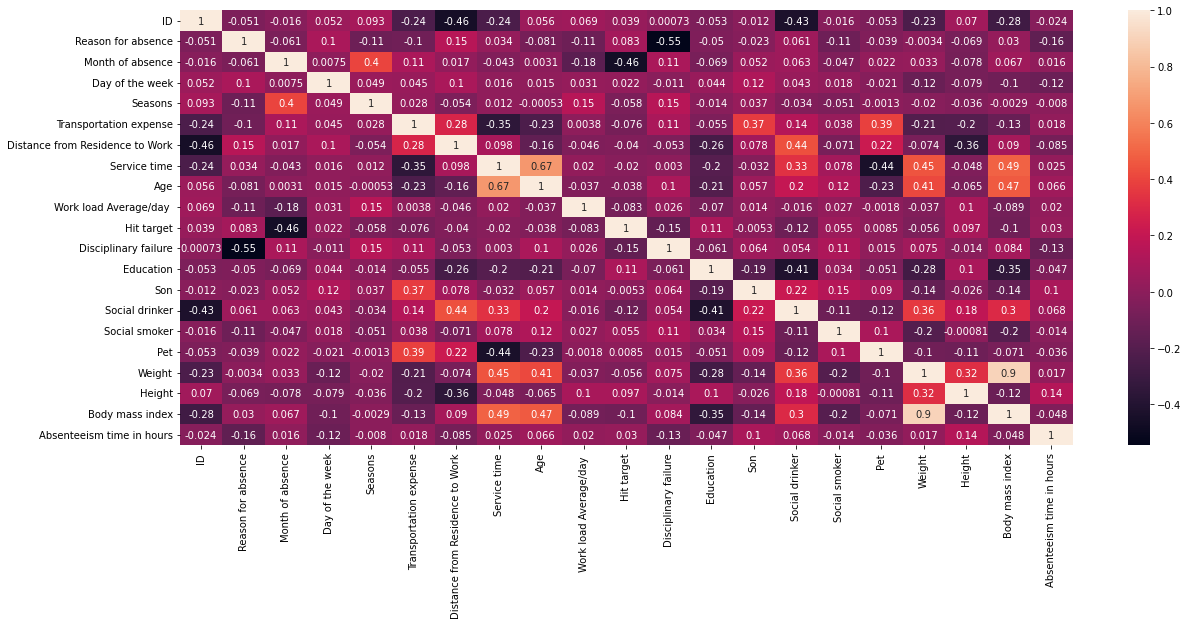

In [17]:
plt.figure(figsize=(20,8))
sns.heatmap(df1.corr(),annot=True);

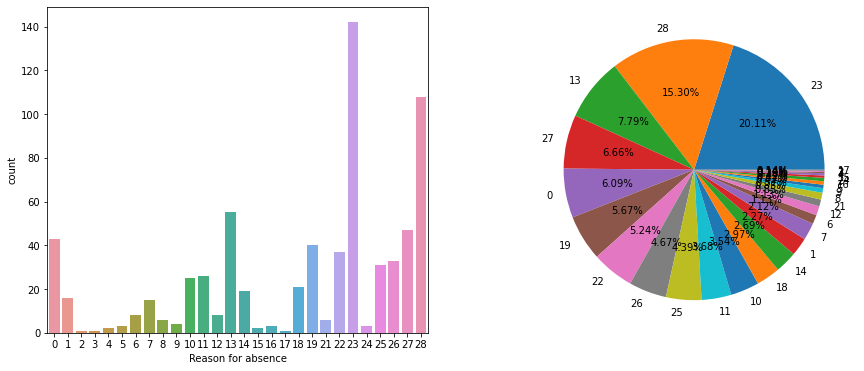

In [18]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(df["Reason for absence"],ax=ax[0])
percentage=df["Reason for absence"].value_counts()
labels=list(df["Reason for absence"].value_counts().index)
plt.pie(percentage,labels=labels,autopct="%0.2f%%");

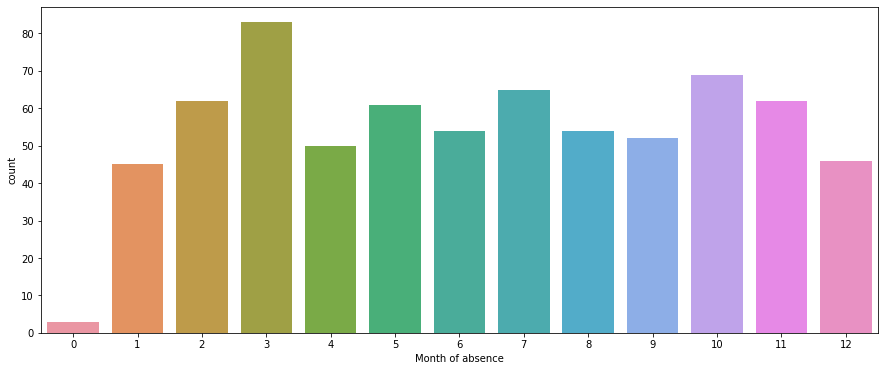

In [19]:
fig,ax=plt.subplots(1,1,figsize=(15,6))
sns.countplot(df["Month of absence"]);
#sns.boxplot(df["Month of absence"],ax=ax[1])
#percentage=df["Month of absence"].value_counts()
#labels=list(df["Month of absence"].value_counts().index)
#plt.pie(percentage,labels=labels,autopct="%0.2f%%");

We found that maximum amount of people are absent in March

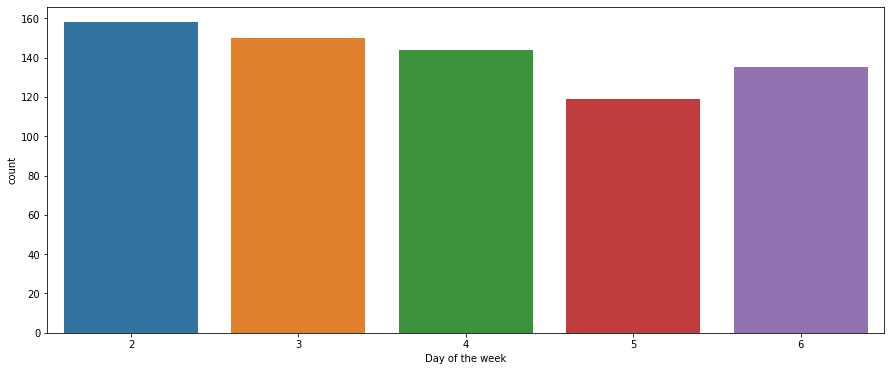

In [20]:
fig,ax=plt.subplots(1,1,figsize=(15,6))
sns.countplot(df["Day of the week"]);
#sns.boxplot(df["Day of the week"],ax=ax[1])
#percentage=df["Day of the week"].value_counts()
#labels=list(df["Day of the week"].value_counts().index)
#plt.pie(percentage,labels=labels,autopct="%0.2f%%");

We found that least amount of people are absent on friday.

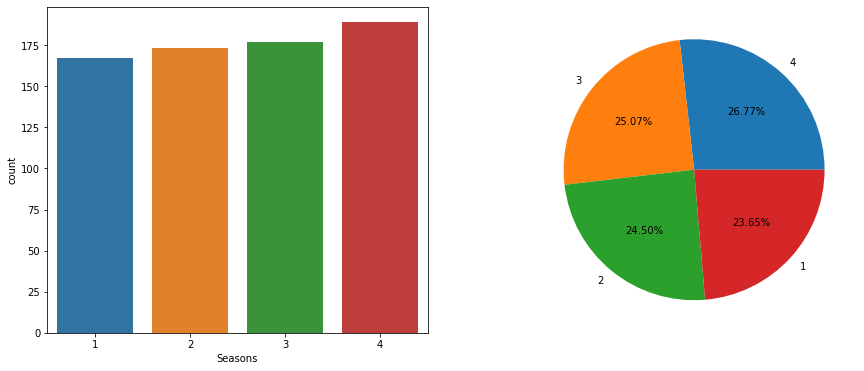

In [21]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(df["Seasons"],ax=ax[0])
percentage=df["Seasons"].value_counts()
labels=list(df["Seasons"].value_counts().index)
plt.pie(percentage,labels=labels,autopct="%0.2f%%");

We found that most people are absent in summer and winter season.

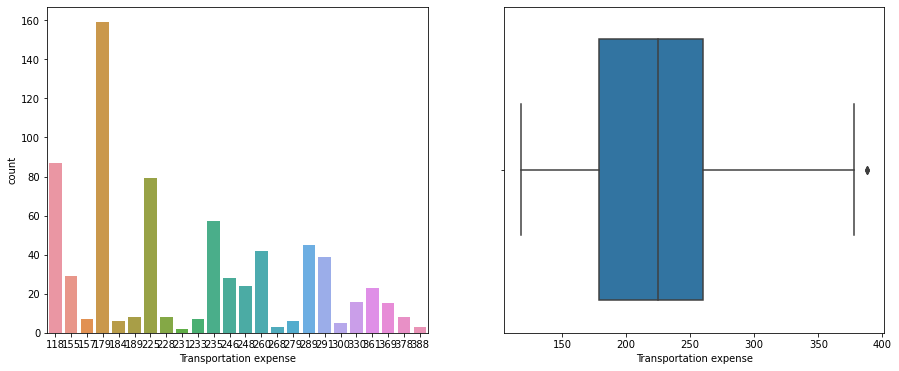

In [22]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(df["Transportation expense"],ax=ax[0])
sns.boxplot(df["Transportation expense"],ax=ax[1]);

Maximum amount of people are absent due to transportation costs.

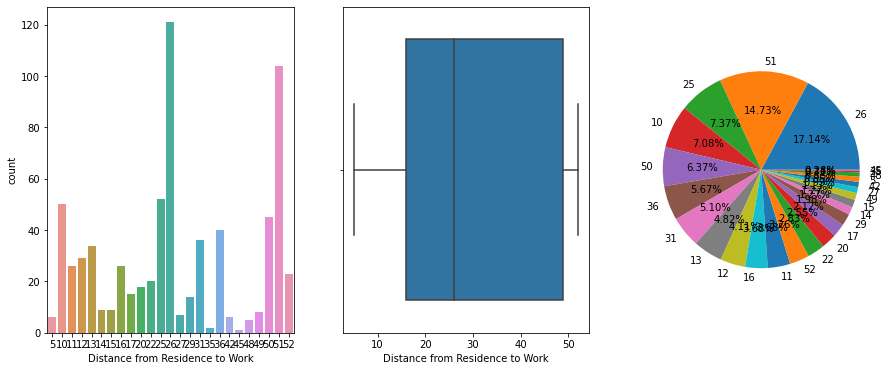

In [23]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
sns.countplot(df["Distance from Residence to Work"],ax=ax[0])
sns.boxplot(df["Distance from Residence to Work"],ax=ax[1])
percentage=df["Distance from Residence to Work"].value_counts()
labels=list(df["Distance from Residence to Work"].value_counts().index)
plt.pie(percentage,labels=labels,autopct="%0.2f%%");

Large amount of people are absent because they live very far from the office.

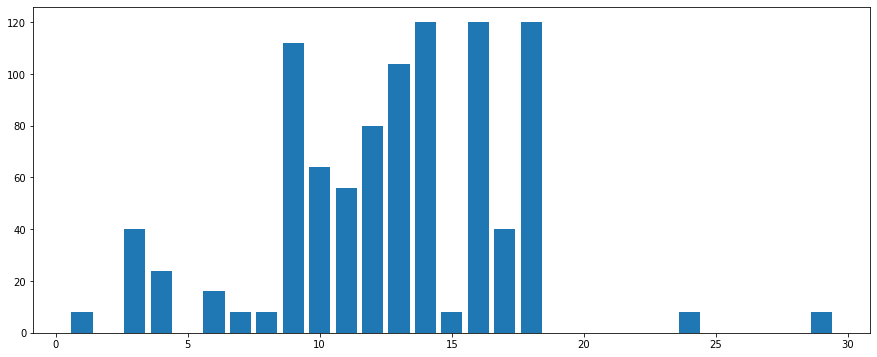

In [24]:
fig,ax=plt.subplots(1,1,figsize=(15,6))
plt.bar(height=df["Absenteeism time in hours"],x=df["Service time"])
plt.xlabel("");
#sns.boxplot(df["Service time"],ax=ax[1])
#percentage=df["Service time"].value_counts()
#labels=list(df["Service time"].value_counts().index)
#plt.pie(percentage,labels=labels,autopct="%0.2f%%");



The amount of absentees in employees is higher for those whose service time is below 18 years.

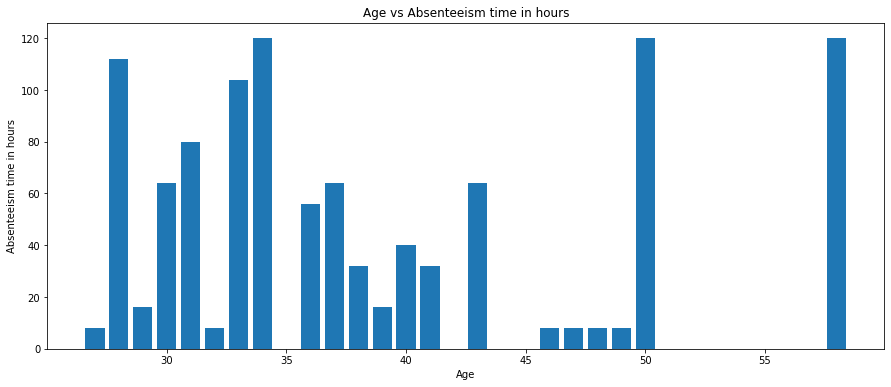

In [25]:
fig,ax=plt.subplots(1,1,figsize=(15,6))
plt.bar(height=df["Absenteeism time in hours"],x=df["Age"]);
plt.title("Age vs Absenteeism time in hours")
plt.xlabel('Age')
plt.ylabel("Absenteeism time in hours")
plt.show()

Maximum amount of absentees are of the age 58.

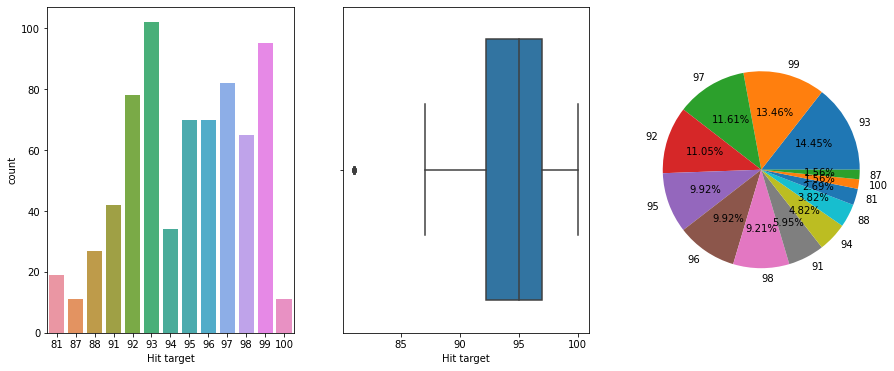

In [26]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
sns.countplot(df["Hit target"],ax=ax[0])
sns.boxplot(df["Hit target"],ax=ax[1])
percentage=df["Hit target"].value_counts()
labels=list(df["Hit target"].value_counts().index)
plt.pie(percentage,labels=labels,autopct="%0.2f%%");

Maximum amount of absentees have a hit rate of 93.

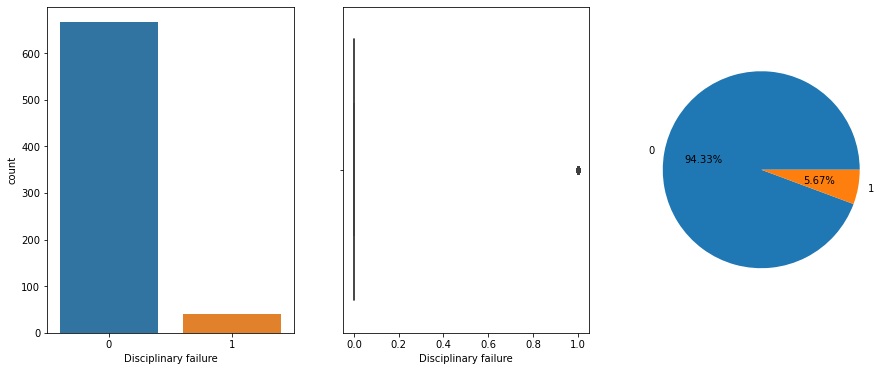

In [27]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
sns.countplot(df["Disciplinary failure"],ax=ax[0])
sns.boxplot(df["Disciplinary failure"],ax=ax[1])
percentage=df["Disciplinary failure"].value_counts()
labels=list(df["Disciplinary failure"].value_counts().index)
plt.pie(percentage,labels=labels,autopct="%0.2f%%");

Maximum amount of employees are disciplined.

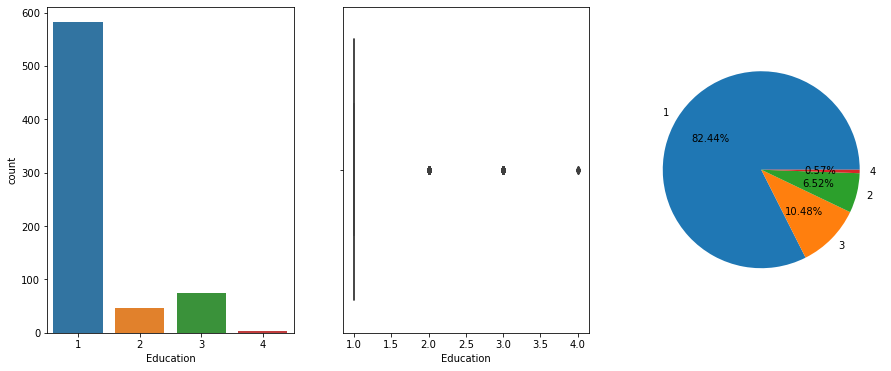

In [28]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
sns.countplot(df["Education"],ax=ax[0])
sns.boxplot(df["Education"],ax=ax[1])
percentage=df["Education"].value_counts()
labels=list(df["Education"].value_counts().index)
plt.pie(percentage,labels=labels,autopct="%0.2f%%");

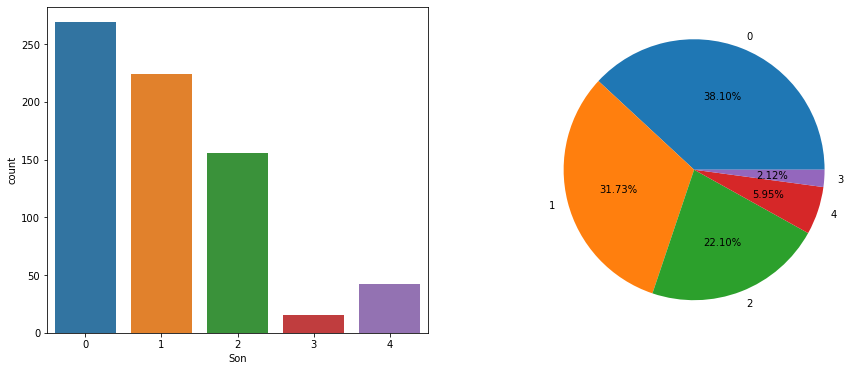

In [29]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(df["Son"],ax=ax[0])
percentage=df["Son"].value_counts()
labels=list(df["Son"].value_counts().index)
plt.pie(percentage,labels=labels,autopct="%0.2f%%");

Maximum amount of employees dont have a son.

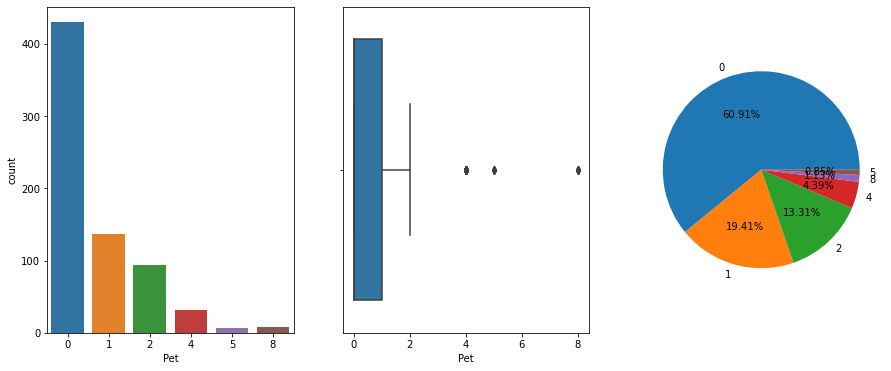

In [30]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
sns.countplot(df["Pet"],ax=ax[0])
sns.boxplot(df["Pet"],ax=ax[1])
percentage=df["Pet"].value_counts()
labels=list(df["Pet"].value_counts().index)
plt.pie(percentage,labels=labels,autopct="%0.2f%%");

Maximum amount of employees don't have a pet.

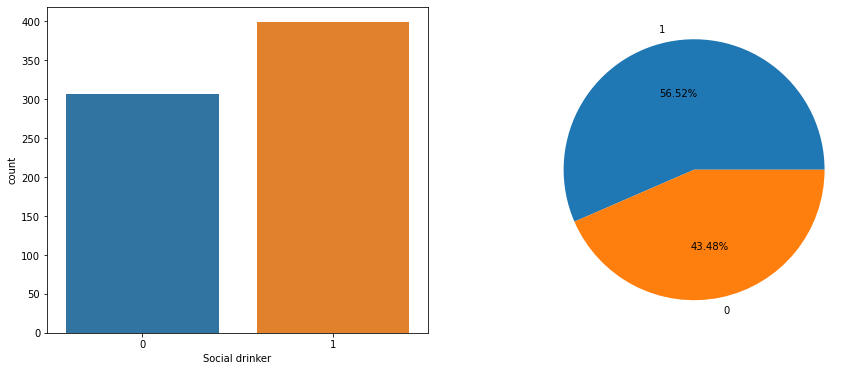

In [31]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(df["Social drinker"],ax=ax[0])
percentage=df["Social drinker"].value_counts()
labels=list(df["Social drinker"].value_counts().index)
plt.pie(percentage,labels=labels,autopct="%0.2f%%");

Maximum amount of employees are social drinkers.

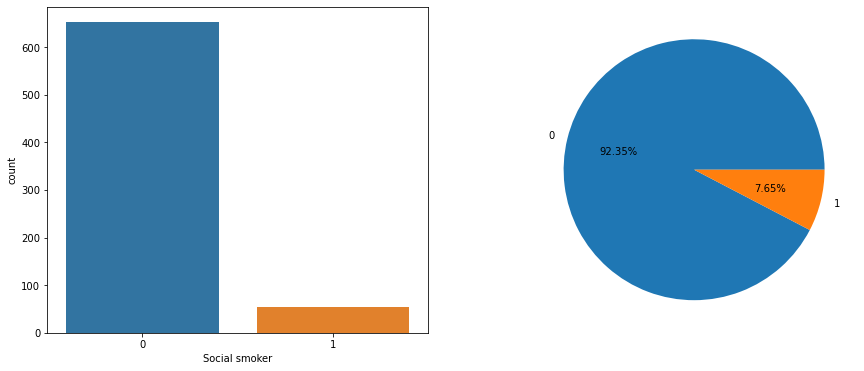

In [32]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(df["Social smoker"],ax=ax[0])
percentage=df['Social smoker'].value_counts()
labels=list(df['Social smoker'].value_counts().index)
plt.pie(percentage,labels=labels,autopct="%0.2f%%");

Least amount of employees are social smokers.

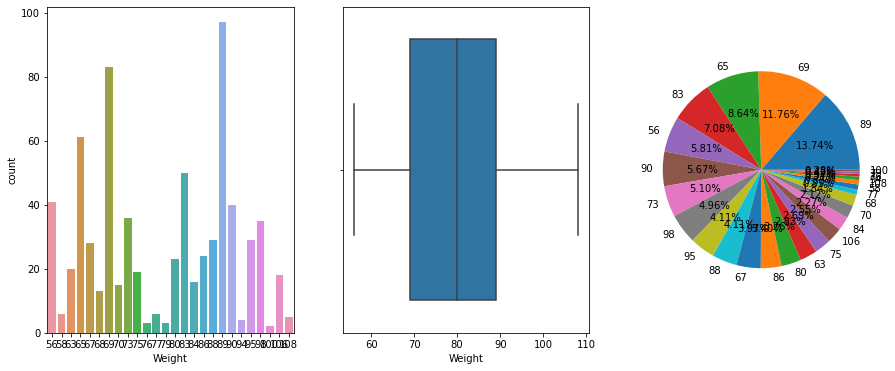

In [33]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
sns.countplot(df["Weight"],ax=ax[0])
sns.boxplot(df["Weight"],ax=ax[1])
percentage=df["Weight"].value_counts()
labels=list(df["Weight"].value_counts().index)
plt.pie(percentage,labels=labels,autopct="%0.2f%%");

Maximum amount of emloyees have a weight of 89kgs.

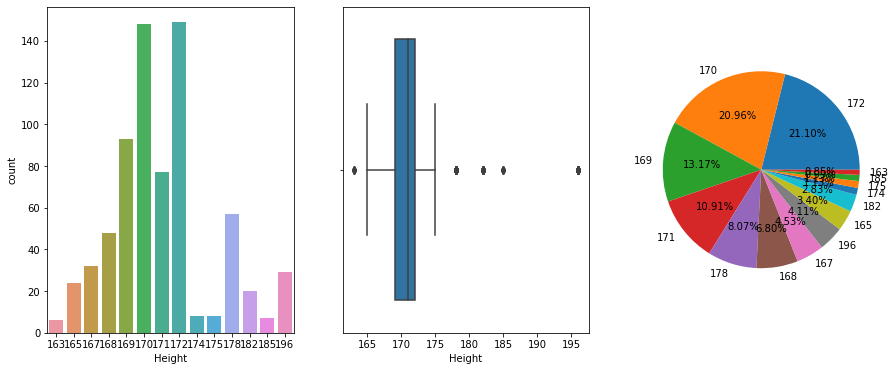

In [34]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
sns.countplot(df["Height"],ax=ax[0])
sns.boxplot(df["Height"],ax=ax[1])
percentage=df["Height"].value_counts()
labels=list(df["Height"].value_counts().index)
plt.pie(percentage,labels=labels,autopct="%0.2f%%");

Maximum amount of employees have a height of 170cm.

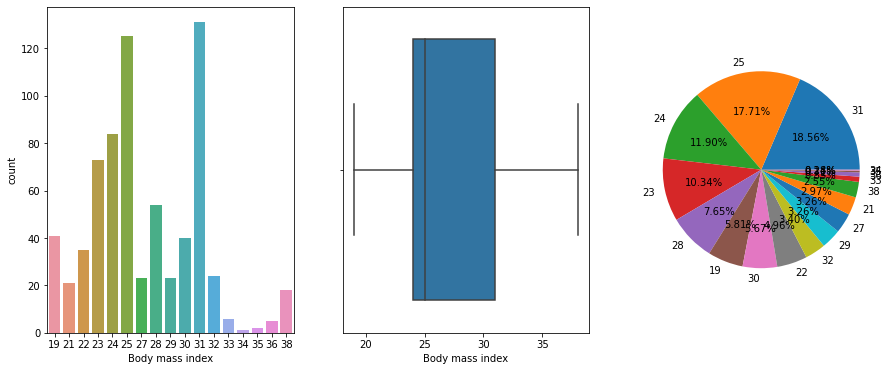

In [35]:
fig,ax=plt.subplots(1,3,figsize=(15,6))
sns.countplot(df["Body mass index"],ax=ax[0])
sns.boxplot(df["Body mass index"],ax=ax[1])
percentage=df["Body mass index"].value_counts()
labels=list(df["Body mass index"].value_counts().index)
plt.pie(percentage,labels=labels,autopct="%0.2f%%");

Maximum amount of employees have a body index of 31.

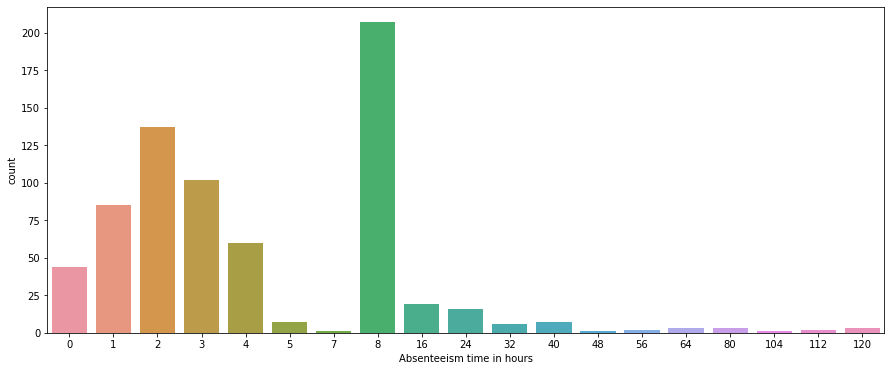

In [36]:
fig,ax=plt.subplots(1,1,figsize=(15,6))
sns.countplot(df["Absenteeism time in hours"]);
#sns.boxplot(df["Absenteeism time in hours"],ax=ax[1])
#percentage=df["Absenteeism time in hours"].value_counts()
#labels=list(df["Absenteeism time in hours"].value_counts().index)
#plt.pie(percentage,labels=labels,autopct="%0.2f%%");

Maximum amount of employees are absent for greater than 8hrs.

In [37]:
X=df1.drop(["ID","Absenteeism time in hours"],axis='columns')

In [38]:
X

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0.839646,0.173182,-0.625440,-1.382645,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,-0.245072,-0.434835,0.850679,0.877168,-0.287788,0.173279,0.855365,-0.032906,0.791184
1,-2.227525,0.173182,-0.625440,-1.382645,-1.561100,-1.108954,1.260392,2.061557,-0.825141,0.645025,4.080441,-0.434835,-0.055172,0.877168,-0.287788,-0.577243,1.477769,0.941840,1.026373
2,0.485741,0.173182,0.076564,-1.382645,-0.653979,1.476741,1.260392,0.231941,-0.825141,0.645025,-0.245072,-0.434835,-0.961024,0.877168,-0.287788,-0.577243,0.777564,-0.357821,1.026373
3,-1.401748,0.173182,0.778568,-1.382645,0.833103,-1.653311,0.344451,0.384409,-0.825141,0.645025,-0.245072,-0.434835,0.850679,0.877168,3.474777,-0.577243,-0.856246,-0.682736,-0.619955
4,0.485741,0.173182,0.778568,-1.382645,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,-0.245072,-0.434835,0.850679,0.877168,-0.287788,0.173279,0.855365,-0.032906,0.791184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,-0.575972,0.173182,-0.625440,-1.382645,0.981812,0.456072,0.115466,-0.530399,-0.189851,-0.407286,-0.245072,-0.434835,0.850679,0.877168,-0.287788,0.173279,0.855365,-0.032906,0.791184
702,-0.929876,0.173182,-0.625440,-1.382645,0.178787,-1.245043,0.344451,0.079473,-0.189851,-0.407286,-0.245072,2.545686,-0.055172,-1.140033,-0.287788,0.173279,0.699764,-0.032906,0.555994
703,-2.227525,-1.884190,-0.625440,-1.382645,-1.561100,-1.040909,0.115466,0.536877,-0.022089,0.118869,-0.245072,-0.434835,-0.055172,0.877168,-0.287788,5.426931,1.477769,-0.357821,1.731943
704,-2.227525,-1.884190,0.076564,-0.490371,0.119304,0.388028,0.344451,0.384409,-0.022089,0.118869,-0.245072,-0.434835,0.850679,0.877168,-0.287788,0.923801,1.633370,-0.357821,1.967132


This shows that there are outliers.

In [39]:
X.shape

(706, 19)

In [40]:
# Feature Extraction

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca1=PCA(n_components=14)
pca_X=pca1.fit_transform(X)
pca1_ratio=pca1.explained_variance_ratio_
pca1_ratio

array([0.17318567, 0.11909488, 0.09953717, 0.08018557, 0.07360654,
       0.06621039, 0.05723437, 0.05137887, 0.05072927, 0.0450692 ,
       0.04152226, 0.03478923, 0.02562562, 0.02299835])

In [43]:
pca_X

array([[ 0.735072  ,  1.02003194, -1.61766225, ...,  0.25418095,
        -0.68174106,  0.02176135],
       [ 3.48848443, -0.9521028 ,  3.01720464, ..., -1.2254624 ,
         0.4246665 , -0.91500331],
       [ 2.12259381, -0.00718313, -1.81011871, ..., -0.07382144,
         0.01258892,  0.21883285],
       ...,
       [ 1.18820539,  0.23828658, -0.06124775, ..., -0.49157111,
         3.23218475, -1.34157277],
       [ 1.96253594,  0.78133543, -0.16048955, ...,  0.42924261,
         0.79324621, -0.01194629],
       [ 0.63715199, -0.60858179,  0.45813922, ..., -0.39228025,
         2.48576551,  0.3699452 ]])

In [44]:
np.sum(pca1_ratio)

0.9411673741326395

Clustering using KMEANS

In [45]:
from sklearn.cluster import KMeans

In [46]:
WCSS=[]
for i in range(5,30):
    km1=KMeans(n_clusters=i)
    km1_pca_X=km1.fit_predict(X)
    WCSS.append(km1.inertia_)

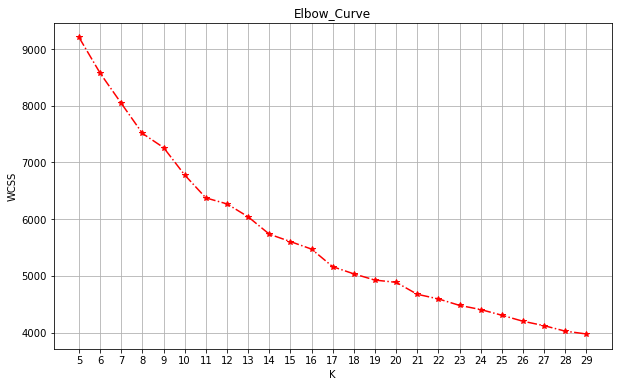

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(5,30),WCSS,'r*-.')
plt.title("Elbow_Curve")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.xticks(range(5,30))
plt.grid()
plt.show()

In [48]:
from sklearn.metrics import silhouette_score

In [49]:
ss=[]
for k in range(5,30):
    km2=KMeans(n_clusters=k)
    km2.fit(X)
    cluster_labels=km2.labels_
    ss.append(silhouette_score(X,cluster_labels))
    

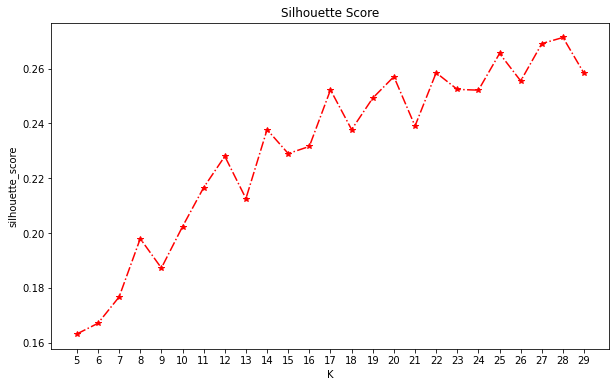

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(5,30),ss,'r*-.')
plt.title("Silhouette Score")
plt.xlabel("K")
plt.ylabel("silhouette_score")
plt.xticks(range(5,30))
plt.show()

### k=12

In [51]:
kmean1=KMeans(n_clusters=7)
kmean1_X_pred=kmean1.fit_predict(X)
kmean1_X_pred

array([2, 6, 4, 2, 2, 4, 1, 2, 3, 0, 2, 2, 2, 4, 4, 2, 4, 1, 5, 0, 4, 1,
       2, 2, 1, 2, 0, 2, 4, 4, 5, 0, 5, 4, 1, 2, 2, 5, 2, 1, 5, 4, 5, 3,
       5, 4, 2, 2, 2, 6, 6, 1, 5, 6, 6, 1, 4, 6, 5, 4, 2, 4, 5, 6, 0, 4,
       1, 1, 5, 2, 4, 1, 2, 2, 1, 2, 1, 2, 4, 1, 4, 0, 2, 3, 1, 2, 3, 1,
       0, 1, 2, 5, 1, 2, 2, 5, 5, 5, 0, 1, 2, 5, 1, 1, 2, 1, 5, 2, 1, 1,
       5, 5, 3, 1, 1, 1, 1, 5, 1, 5, 5, 5, 5, 0, 2, 5, 1, 2, 1, 2, 4, 3,
       1, 2, 2, 5, 5, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 3, 0, 2, 2, 0, 5,
       2, 0, 3, 2, 3, 2, 0, 2, 1, 2, 4, 1, 1, 0, 1, 1, 4, 2, 1, 5, 1, 2,
       1, 3, 2, 3, 1, 2, 4, 5, 2, 2, 2, 5, 2, 2, 3, 1, 2, 0, 6, 2, 3, 3,
       4, 1, 1, 3, 4, 2, 6, 6, 6, 6, 4, 5, 1, 2, 1, 2, 2, 2, 4, 3, 2, 5,
       0, 5, 5, 1, 4, 4, 1, 3, 5, 5, 5, 0, 0, 3, 0, 0, 3, 1, 2, 4, 2, 2,
       6, 2, 0, 2, 5, 2, 2, 2, 2, 5, 0, 0, 5, 5, 0, 5, 0, 1, 1, 4, 4, 2,
       6, 2, 2, 6, 6, 4, 2, 4, 2, 2, 5, 5, 6, 2, 2, 4, 2, 0, 2, 2, 6, 6,
       0, 5, 2, 4, 0, 6, 2, 2, 6, 5, 5, 2, 0, 5, 1,

In [52]:
df["kmean_X_pred"]=kmean1_X_pred

In [53]:
kmean_X_ss=metrics.silhouette_score(X,df["kmean_X_pred"]) #7=0.183,8=0.204,10=0.212,11=0.213,12=0.240

In [54]:
kmean2=KMeans(n_clusters=7)
kmean2_pca_pred=kmean2.fit_predict(pca_X)
df["kmean_pca_pred"]=kmean2_pca_pred

In [55]:
kmean_pca_ss=metrics.silhouette_score(X,df["kmean_pca_pred"]) #7=0.181,8=0.205,10=0.218,11=0.180,12=217

In [56]:
np.unique(kmean2_pca_pred)

array([0, 1, 2, 3, 4, 5, 6])

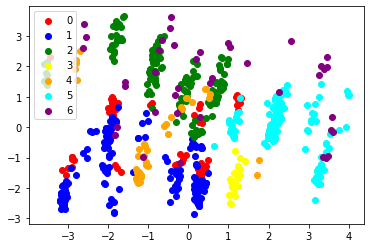

In [57]:
plt.scatter(pca_X[kmean2_pca_pred==0,0],pca_X[kmean2_pca_pred==0,1],c='red',label=0)
plt.scatter(pca_X[kmean2_pca_pred==1,0],pca_X[kmean2_pca_pred==1,1],c='blue',label=1)
plt.scatter(pca_X[kmean2_pca_pred==2,0],pca_X[kmean2_pca_pred==2,1],c='green',label=2)
plt.scatter(pca_X[kmean2_pca_pred==3,0],pca_X[kmean2_pca_pred==3,1],c='yellow',label=3)
plt.scatter(pca_X[kmean2_pca_pred==4,0],pca_X[kmean2_pca_pred==4,1],c='orange',label=4)
plt.scatter(pca_X[kmean2_pca_pred==5,0],pca_X[kmean2_pca_pred==5,1],c='cyan',label=5)
plt.scatter(pca_X[kmean2_pca_pred==6,0],pca_X[kmean2_pca_pred==6,1],c='purple',label=6)
plt.legend()
plt.show()

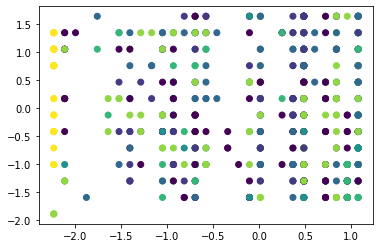

In [58]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=df["kmean_X_pred"])
plt.show()

Clustering using Hierarchial Method

In [59]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

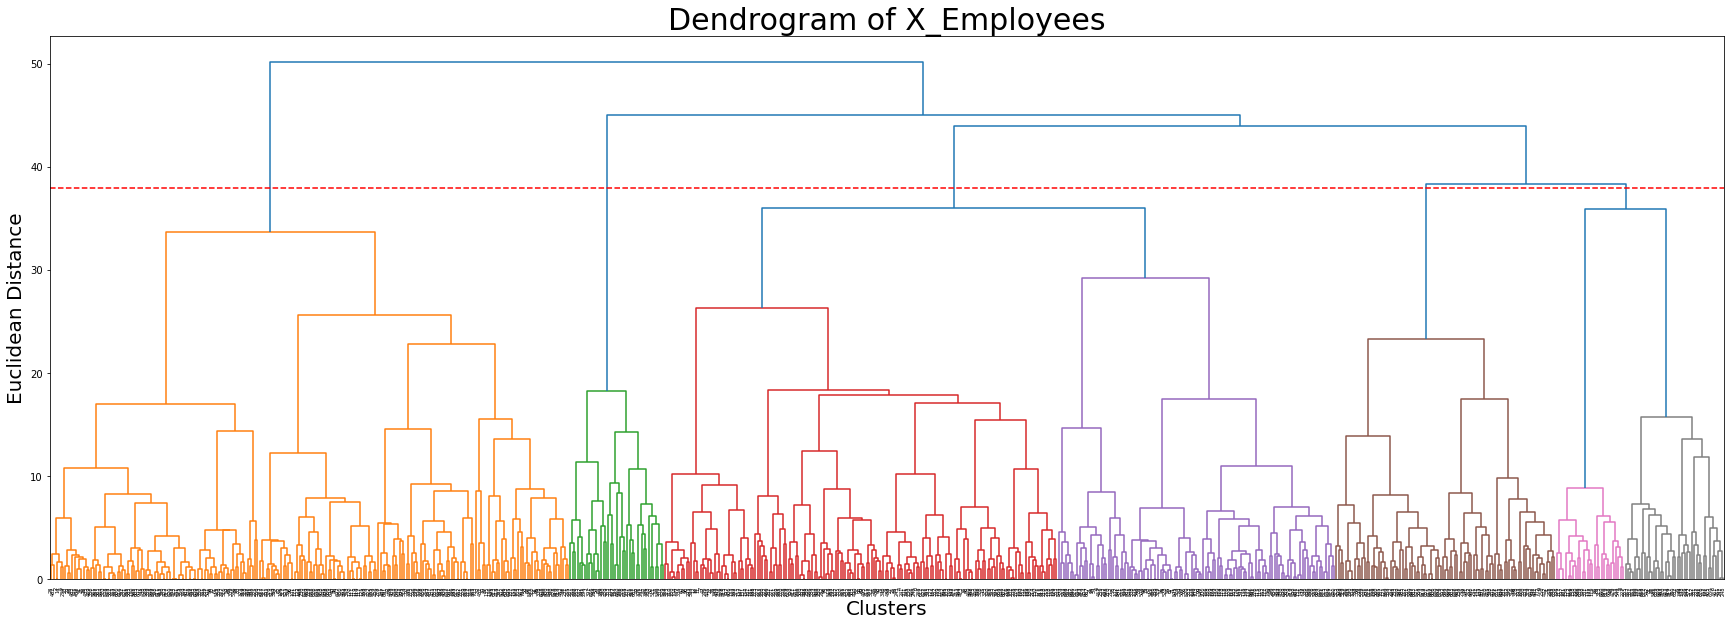

In [60]:
plt.figure(figsize=(30,10))
den=sch.dendrogram(sch.linkage(X,method='ward'),labels=X.index)
plt.axhline(y=38,color='red',linestyle='--') #38=6
plt.title("Dendrogram of X_Employees",fontsize=30)
plt.xlabel("Clusters",fontsize=20)
plt.ylabel("Euclidean Distance",fontsize=20)
plt.show()

In [61]:
agglo1=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
agglo_X_pred=agglo1.fit_predict(X)
agglo_X_pred

array([0, 2, 3, 1, 0, 3, 0, 0, 1, 4, 0, 0, 0, 3, 3, 0, 3, 0, 3, 4, 3, 0,
       0, 0, 0, 0, 1, 0, 3, 3, 3, 4, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 1,
       3, 3, 0, 0, 0, 2, 2, 0, 3, 2, 2, 0, 3, 2, 3, 3, 0, 3, 3, 2, 4, 3,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 3, 0, 0, 0, 3, 3, 3, 4, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0,
       3, 3, 1, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 4, 0, 3, 0, 0, 0, 0, 3, 1,
       0, 0, 0, 3, 3, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0, 1, 1, 0, 0, 4, 3,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 1, 0, 3, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 1, 1, 0, 4, 2, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3,
       4, 3, 3, 1, 0, 3, 0, 1, 3, 3, 3, 4, 4, 1, 4, 4, 1, 0, 0, 3, 0, 0,
       2, 0, 1, 0, 3, 1, 1, 0, 0, 3, 4, 4, 3, 3, 4, 3, 4, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 3, 2, 0, 0, 0, 0, 4, 0, 0, 2, 2,
       4, 3, 0, 3, 4, 2, 0, 0, 2, 3, 3, 0, 4, 3, 0,

In [62]:
df["agglo_X_pred"]=agglo_X_pred

In [110]:
n_ag=np.unique(agglo_X_pred)

In [111]:
agglo_X_ss=metrics.silhouette_score(X,df["agglo_X_pred"])  #4=0.137,5=0.135,6=0.154,8=0.182

In [112]:
pca_X_df=pd.DataFrame(pca_X)
pca_X_df.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.735072,1.020032,-1.617662,0.032480,1.151878,0.306921,-1.277724,0.104096,0.080316,-0.248391,-0.484619,0.254181,-0.681741,0.021761
1,3.488484,-0.952103,3.017205,1.808251,1.404069,1.372125,-0.910485,2.164713,0.364263,-0.133809,-0.143865,-1.225462,0.424667,-0.915003
2,2.122594,-0.007183,-1.810119,-0.265133,-0.131332,0.879959,-0.072635,1.065475,0.563775,-0.118546,0.848843,-0.073821,0.012589,0.218833
3,-0.554786,0.103737,0.663160,3.102208,-1.196101,0.641239,-2.109185,-0.364154,0.563642,0.506019,0.434922,-0.330905,-0.559290,2.024233


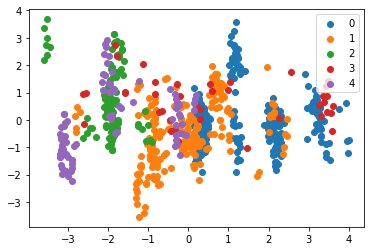

In [116]:
for i in n_ag:
    fil_lab=pca_X_df[agglo_pca_pred==i]
    plt.scatter(fil_lab.iloc[:,0],fil_lab.iloc[:,4],label=i)
plt.legend()
plt.show()

In [64]:
agglo2=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
agglo_pca_pred=agglo2.fit_predict(pca_X)
agglo_pca_pred

array([1, 3, 0, 1, 1, 0, 2, 1, 0, 4, 1, 1, 1, 0, 0, 1, 0, 2, 0, 4, 0, 2,
       1, 1, 2, 1, 1, 1, 0, 0, 0, 4, 0, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 3, 3, 2, 0, 3, 3, 2, 0, 3, 0, 0, 1, 0, 0, 3, 4, 0,
       2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 2,
       1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 4, 2, 1, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 4, 1, 0, 2, 1, 2, 1, 0, 0,
       2, 1, 1, 1, 1, 2, 2, 4, 2, 2, 4, 4, 2, 2, 1, 1, 1, 1, 1, 1, 4, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 4, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 0, 0,
       1, 2, 2, 0, 1, 1, 3, 3, 3, 3, 1, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 4, 4, 0, 4, 4, 1, 2, 1, 0, 1, 1,
       3, 1, 1, 1, 0, 1, 1, 1, 1, 0, 4, 4, 0, 0, 4, 0, 4, 2, 2, 1, 1, 1,
       3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 1, 4, 1, 1, 3, 3,
       4, 0, 1, 0, 4, 3, 1, 1, 3, 0, 0, 1, 4, 0, 2,

In [65]:
df["agglo_pca_pred"]=agglo_pca_pred

In [66]:
agglo_pca_ss=metrics.silhouette_score(X,df["agglo_pca_pred"]) #4=0.137,5=0.155,6=0.174,8=0.168

In [122]:
p_agg=np.unique(agglo_pca_pred)

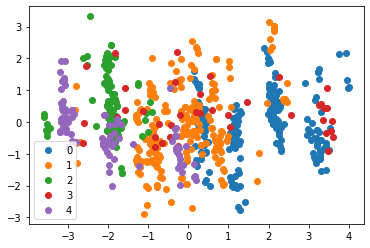

In [123]:
for i in p_agg:
    fil_lab_p=pca_X_df[agglo_pca_pred==i]
    plt.scatter(fil_lab_p.iloc[:,0],fil_lab_p.iloc[:,6],label=i)
plt.legend()
plt.show()

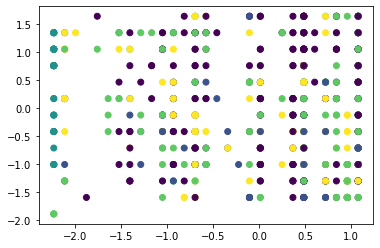

In [68]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=df["agglo_X_pred"])
plt.show()

In [69]:
"""plt.scatter(X[agglo_X_pred==0,0],X[agglo_X_pred==0,1],c='red',label=0)
plt.scatter(X[agglo_X_pred==1,0],X[agglo_X_pred==1,1],c='blue',label=1)
plt.scatter(X[agglo_X_pred==2,0],X[agglo_X_pred==2,1],c='green',label=2)
plt.scatter(X[agglo_X_pred==3,0],X[agglo_X_pred==3,1],c='yellow',label=3)
plt.scatter(X[agglo_X_pred==4,0],X[agglo_X_pred==4,1],c='orange',label=4)
#plt.scatter(pca_X[agglo_pca_pred==5,0],pca_X[agglo_pca_pred==5,1],c='cyan',label=5)
plt.legend()
plt.show()"""

"plt.scatter(X[agglo_X_pred==0,0],X[agglo_X_pred==0,1],c='red',label=0)\nplt.scatter(X[agglo_X_pred==1,0],X[agglo_X_pred==1,1],c='blue',label=1)\nplt.scatter(X[agglo_X_pred==2,0],X[agglo_X_pred==2,1],c='green',label=2)\nplt.scatter(X[agglo_X_pred==3,0],X[agglo_X_pred==3,1],c='yellow',label=3)\nplt.scatter(X[agglo_X_pred==4,0],X[agglo_X_pred==4,1],c='orange',label=4)\n#plt.scatter(pca_X[agglo_pca_pred==5,0],pca_X[agglo_pca_pred==5,1],c='cyan',label=5)\nplt.legend()\nplt.show()"

Clustering using density method(DBSCAN)

In [70]:
from sklearn.cluster import DBSCAN

In [71]:
from sklearn.neighbors import NearestNeighbors

In [72]:
nn1=NearestNeighbors(n_neighbors=2)
nn_X_pred=nn1.fit(X)

In [73]:
distances,indices=nn_X_pred.kneighbors(X)

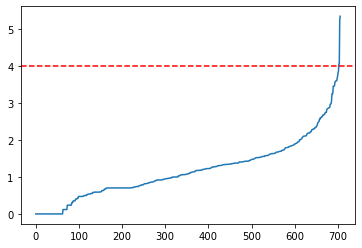

In [74]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.axhline(y=4,color='red',linestyle='--');

In [75]:
eps=4
for min_samples in [5,7,8,9,11,12,13,14,16,18,20,24,25,26]:
    clusterer=DBSCAN(eps=eps,min_samples=min_samples)
    cluster_labels=clusterer.fit_predict(X)
    print(clusterer)
    x=cluster_labels+2
    y=np.bincount(x)
    ii=np.nonzero(y)[0]
    results=list(zip(ii,y[ii]))
    print("eps:",eps,"min_samples:",min_samples,"labels:",results)

DBSCAN(eps=4)
eps: 4 min_samples: 5 labels: [(1, 16), (2, 577), (3, 30), (4, 31), (5, 29), (6, 6), (7, 5), (8, 7), (9, 5)]
DBSCAN(eps=4, min_samples=7)
eps: 4 min_samples: 7 labels: [(1, 35), (2, 577), (3, 31), (4, 29), (5, 27), (6, 7)]
DBSCAN(eps=4, min_samples=8)
eps: 4 min_samples: 8 labels: [(1, 44), (2, 577), (3, 31), (4, 29), (5, 25)]
DBSCAN(eps=4, min_samples=9)
eps: 4 min_samples: 9 labels: [(1, 46), (2, 577), (3, 31), (4, 29), (5, 23)]
DBSCAN(eps=4, min_samples=11)
eps: 4 min_samples: 11 labels: [(1, 50), (2, 577), (3, 29), (4, 19), (5, 31)]
DBSCAN(eps=4, min_samples=12)
eps: 4 min_samples: 12 labels: [(1, 56), (2, 576), (3, 29), (4, 31), (5, 14)]
DBSCAN(eps=4, min_samples=13)
eps: 4 min_samples: 13 labels: [(1, 56), (2, 576), (3, 29), (4, 31), (5, 14)]
DBSCAN(eps=4, min_samples=14)
eps: 4 min_samples: 14 labels: [(1, 56), (2, 576), (3, 29), (4, 31), (5, 14)]
DBSCAN(eps=4, min_samples=16)
eps: 4 min_samples: 16 labels: [(1, 74), (2, 574), (3, 29), (4, 29)]
DBSCAN(eps=4, min_sa

eps=4 & min_samples=16

In [76]:
print(type(y))

<class 'numpy.ndarray'>


In [77]:
dbs1=DBSCAN(eps=4,min_samples=24)#16
dbs_X_pred=dbs1.fit_predict(X)
dbs_X_pred

array([ 0, -1,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1, -1,
        0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,
        0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0, -1,  1,  0,  1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1, -1,  0,  0, -1,  0,  1,  1,  0,  0,  0,  1,  0,  0,
       -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0, -1,  0, -1

In [99]:
df["dbs_X_pred"]=dbs_X_pred

In [100]:
dbs_X_ss=metrics.silhouette_score(X,df["dbs_X_pred"]) #eps=3.5-> 11=0.154,20=147,24=169
#eps=4, 16=0.147

In [120]:
dbs_n=np.unique(dbs_X_pred)

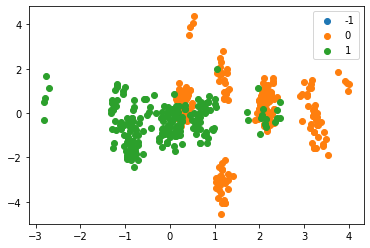

In [121]:
for i in dbs_n:
    fill_lab1=pca_X_df[agglo_pca_pred==i]
    plt.scatter(fill_lab1.iloc[:,0],fill_lab1.iloc[:,5],label=i)
plt.legend()
plt.show()

In [103]:
"""plt.scatter(X[dbs_X_pred==0,0],X[dbs_X_pred==0,1],c='red',label=0)
plt.scatter(X[dbs_X_pred==1,0],X[dbs_X_pred==1,1],c='blue',label=1)
plt.scatter(X[dbs_X_pred==2,0],X[dbs_X_pred==2,1],c='green',label=2)
plt.legend()
plt.show()"""

"plt.scatter(X[dbs_X_pred==0,0],X[dbs_X_pred==0,1],c='red',label=0)\nplt.scatter(X[dbs_X_pred==1,0],X[dbs_X_pred==1,1],c='blue',label=1)\nplt.scatter(X[dbs_X_pred==2,0],X[dbs_X_pred==2,1],c='green',label=2)\nplt.legend()\nplt.show()"

In [80]:
nn2=NearestNeighbors(n_neighbors=2)
nn_pca_pred=nn2.fit(pca_X)

In [81]:
distances,indices=nn_pca_pred.kneighbors(pca_X)

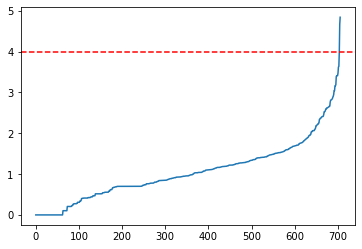

In [82]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.axhline(y=4,color='red',linestyle='--')
plt.show()

In [83]:
eps=4 
for min_samples in [5,7,8,9,11,12,13,14,16,18,20,21,22,24,26]:
    clustr=DBSCAN(eps=eps,min_samples=min_samples)
    clustr_labels=clustr.fit_predict(pca_X)
    print(clustr)
    x=clustr_labels+2
    y=np.bincount(x)
    ii=np.nonzero(y)[0]
    results=list(zip(ii,y[ii]))
    print("eps:",eps,"min_samples:",min_samples,"labels:",results)

DBSCAN(eps=4)
eps: 4 min_samples: 5 labels: [(1, 14), (2, 620), (3, 30), (4, 29), (5, 6), (6, 7)]
DBSCAN(eps=4, min_samples=7)
eps: 4 min_samples: 7 labels: [(1, 22), (2, 620), (3, 29), (4, 28), (5, 7)]
DBSCAN(eps=4, min_samples=8)
eps: 4 min_samples: 8 labels: [(1, 34), (2, 616), (3, 29), (4, 27)]
DBSCAN(eps=4, min_samples=9)
eps: 4 min_samples: 9 labels: [(1, 35), (2, 616), (3, 29), (4, 26)]
DBSCAN(eps=4, min_samples=11)
eps: 4 min_samples: 11 labels: [(1, 40), (2, 616), (3, 29), (4, 21)]
DBSCAN(eps=4, min_samples=12)
eps: 4 min_samples: 12 labels: [(1, 47), (2, 616), (3, 29), (4, 14)]
DBSCAN(eps=4, min_samples=13)
eps: 4 min_samples: 13 labels: [(1, 47), (2, 616), (3, 29), (4, 14)]
DBSCAN(eps=4, min_samples=14)
eps: 4 min_samples: 14 labels: [(1, 47), (2, 616), (3, 29), (4, 14)]
DBSCAN(eps=4, min_samples=16)
eps: 4 min_samples: 16 labels: [(1, 62), (2, 586), (3, 29), (4, 29)]
DBSCAN(eps=4, min_samples=18)
eps: 4 min_samples: 18 labels: [(1, 62), (2, 586), (3, 29), (4, 29)]
DBSCAN(ep

eps=4 & min_samples=16

In [84]:
from sklearn.cluster import DBSCAN

In [90]:
dbs=DBSCAN(eps=4,min_samples=8)#16
dbs_pca_pred=dbs.fit_predict(pca_X)
dbs_pca_pred

array([ 0,  2,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  2,  2,
        0,  0,  2,  2,  0,  0,  2,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1, -1,  0,  0, -1,  0,  1,  1,  0,  0,  0,  1,  0,  0,
       -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0, -1,  0,  0

In [91]:
df["dbs_pca_pred"]=dbs_pca_pred

In [92]:
dbs_pca_ss=metrics.silhouette_score(X,df["dbs_pca_pred"]) #11=0.117,22=0.117,24=0.074 of eps=3.5
#eps=4,16=0.150

In [117]:
n_dbs=np.unique(dbs_pca_pred)
n_dbs

array([-1,  0,  1,  2], dtype=int64)

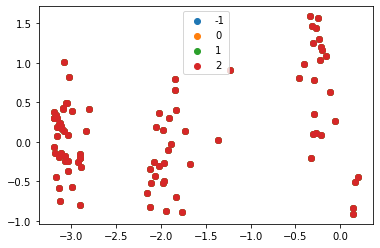

In [118]:
for i in n_dbs:
    fil_lab2=pca_X_df[dbs_pca_pred==i]
    plt.scatter(fil_lab.iloc[:,0],fil_lab.iloc[:,5],label=i)
plt.legend()
plt.show()

In [93]:
#result={"Results":["Result1","Result2","Result3"],"KMeans_X(k:value)":["8:0.186","10:0.200","11:0.213"],"KMeans_pca(k:value)":["8:0.194","10:0.206","11:0.180"],"Agglomerative Clustering_X(clusters:value)":["4:0.131","6:0.150","8:0.182"],"Agglomerative Clustering_pca(clusters:value)":["4:0.120","6:0.154","8:0.168"],"DBSCAN_X(eps,min_samples:value)":["3.5,11:0.154","3.5,20:147","4,16:0.147"],"DBSCAN_pca(eps,min_samples:value)":["3.5,11:0.117","3.5,22:0.117","4,16:0.150"]}
#pd.DataFrame(result)

In [94]:
ss_result=pd.DataFrame({"Models":["KMeans","Agglomerative Clustering","DBSCAN"],"Silhouette Score(X)":[kmean_X_ss,agglo_X_ss,dbs_X_ss],"Silhouette Score(pca)":[kmean_pca_ss,agglo_pca_ss,dbs_pca_ss]})
ss_result

,Models,Silhouette Score(X),Silhouette Score(pca)
0,KMeans,0.178857,0.163556
1,Agglomerative Clustering,0.150270,0.133908
2,DBSCAN,0.165973,0.173794
